In [1]:
!pip install karateclub

     |████████████████████████████████| 62 kB 1.3 MB/s eta 0:00:011
     |████████████████████████████████| 1.9 MB 10.4 MB/s eta 0:00:01
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
     |████████████████████████████████| 204 kB 26.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 24.1 MB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 17.6 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 16.5 MB/s eta 0:00:01
  Created wheel for karateclub: filename=karateclub-1.3.0-py3-none-any.whl size=98586 sha256=6920678455e5200cd6df13cf23b51bcc215e8286fe2becb64199a0f73355f123
  Stored in directory: /home/jungyeon/.cache/pip/wheels/52/78/2f/e906cbb1399b8d5a8e8a9d520a832fb2026da4f944de79bb54
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp38-cp38-linux_x86_64.whl size=184779 

In [3]:
import networkx as nx
from karateclub import DeepWalk 
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

Number of nodes (club-members) 34


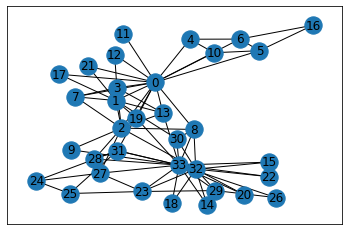

In [4]:
G = nx.karate_club_graph() # load the Zachary's karate club graph
print('Number of nodes (club-members)', len(G.nodes))
nx.draw_networkx(G)

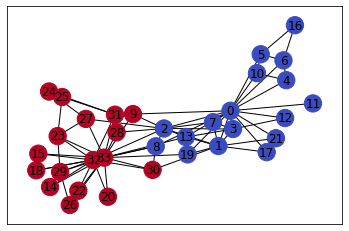

In [5]:
# plot the graph with labels
labels = []
for i in G.nodes:
    club_names = G.nodes[i]['club']
    labels.append(1 if club_names == 'Officer' else 0) #Clubs: 'Officer' or 'Mr.Hi'
    
layout_pos = nx.spring_layout(G)
nx.draw_networkx(G,pos = layout_pos ,node_color = labels, cmap='coolwarm')

In [6]:
# Perform node embedding using DeepWalk
Deepwalk_model = DeepWalk(walk_number=10, walk_length=80, dimensions=124)
Deepwalk_model.fit(G)
embedding = Deepwalk_model.get_embedding()
print('Embedding array shape (nodes x features):',embedding.shape )

Embedding array shape (nodes x features): (34, 124)


Low dimensional embedding representaiton (nodes x 2): (34, 2)


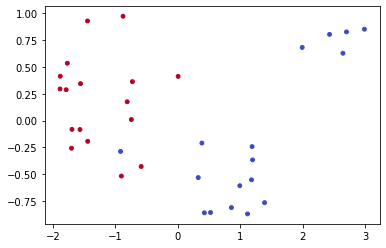

In [7]:
# Low dimensional plot of the neodes x features

PCA_model = sklearn.decomposition.PCA(n_components=2)
lowdimension_embedding = PCA_model.fit_transform(embedding)
print('Low dimensional embedding representaiton (nodes x 2):', lowdimension_embedding.shape)
plt.scatter(lowdimension_embedding[:,0],lowdimension_embedding[:,1],c=labels,
            s=15,cmap='coolwarm')

In [8]:
# Node classification using embedded model
x_train,x_test,y_train,y_test = train_test_split(embedding, labels, test_size=0.3)
ML_model = LogisticRegression(random_state=0).fit(x_train,y_train)
y_predict = ML_model.predict(x_test)
ML_acc = roc_auc_score(y_test,y_predict)
print('AUC:',ML_acc)

AUC: 0.9
